# Evaluating recommender systems

We will look at the restaurant recommendations once more. To evaluate our recommender system, we will split our data into train and test sets again. This allows us to compare predictions with true values and evaluate how well our recommender performs.

In [2]:
import pandas as pd
import numpy as np

# 1.&nbsp;Import data

In [3]:
# Import the csv with the ratings.
url = 'https://drive.google.com/file/d/1ptu4AlEXO4qQ8GytxKHoeuS1y4l_zWkC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
frame = pd.read_csv(path)

users_items = pd.pivot_table(data=frame, 
                                 values='rating', 
                                 index='userID', 
                                 columns='placeID')

users_items.fillna(0, inplace=True)

In [4]:
users_items

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
U1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
U1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U1134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
U1135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2.&nbsp;Train-test split

## 2.1&nbsp;Find all nonzero ratings

This will help us make the train and test split.

The `0.0` ratings cannot go to the test set. Therefore, we need to identify the non-zero ratings and make the split on them.

In [5]:
# Create a DataFrame that contains the positions of all nonzero ratings.
ratings_pos = pd.DataFrame(
    np.nonzero(np.array(users_items)),
    ).T

ratings_pos.head()

,0,1
0,0,31
1,0,32
2,0,75
3,0,81
4,0,85


In [6]:
# Rename the columns.
ratings_pos.columns = ["row_pos", "column_pos"]
ratings_pos.head()

,row_pos,column_pos
0,0,31
1,0,32
2,0,75
3,0,81
4,0,85


How shall we interpret the `rating_pos` DataFrame?

The ratings at the positions [0, 31], [0, 32], [0, 75], [0, 81] etc. from the `users_items` DataFrame are not equal to zero.

The value in the column `row_pos` corresponds to the row index in the `users_items` DataFrame, whereas the value in the column `column_pos` corresponds to the column index.

Example [0,31]: This corresponds to a nonzero rating from the first user (userID = U1001). This is because this user's data is stored in the first row of the `users_items` DataFrame, with index `0`. The rating was for the restaurant in the column at position 31 (132825).

In [7]:
# Get the nonzero ratings from the positions above.
users_items.iloc[0:1, [31, 32, 75, 81, 85]]

placeID,132825,132830,135025,135033,135039
userID,,,,,
U1001,2.0,1.0,2.0,1.0,1.0


Let's find out how many non-zero values are in the `rating_pos` DataFrame. These are the candidates to take part in the train and test split.

In [8]:
len(ratings_pos)

907

## 2.2&nbsp;Make the train and test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Split nonzero ratings into train and test sets.
train_pos, test_pos = train_test_split(ratings_pos, 
                                       random_state=123, 
                                       test_size=.1)

These values are in the train set...

In [11]:
train_pos.sort_values(["row_pos","column_pos"]).head(3)

,row_pos,column_pos
0,0,31
1,0,32
2,0,75


...and these in the test set.

In [12]:
test_pos.sort_values(["row_pos","column_pos"]).head(3)

,row_pos,column_pos
4,0,85
5,0,86
7,0,97


Now we have two DataFrames called `train_pos` and `test_pos` which contain the rating positions in the `users_items` DataFrame.

##2.3&nbsp;Create the train DataFrame

The train and test datasets will both have the same shape as the `users_items`DataFrame. Most of their values will be zero, except for the values in the positions stored inside the `train_pos` set for the train dataset, and the `test_pos`set for the test dataset.

In [13]:
# Create a copy of the users-items DataFrame and set all values to zero.
train = users_items.copy()

for column in train.columns:
  train[column].values[:] = 0

In [14]:
# Sum the values in the DataFrame to check that all of them are equal to zero.
train.sum().sum()

0.0

In [15]:
# Iterate over the nonzero positions in the train dataset.
# Get the corresponding rating for each nonzero position from the users_items DataFrame.
# Insert that value into the newly created DataFrame at the same position.
for pos in train_pos.values: 
    index = pos[0]
    col = pos[1]
    train.iloc[index, col] = users_items.iloc[index, col]

In [16]:
train.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
U1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
U1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


How many ratings from our user `U1001` fell into the train set?

In [17]:
train.iloc[0:1, [31, 32, 75, 81, 85]]

placeID,132825,132830,135025,135033,135039
userID,,,,,
U1001,2.0,1.0,2.0,1.0,0.0


## 2.4&nbsp;Create the test DataFrame

Now it is time for the test set. We will follow the same process.

In [18]:
# Create a copy of the users-items DataFrame and set all values to zero.
test = users_items.copy()

# Iterate over the nonzero positions in the test dataset.
# Get the corresponding rating for each nonzero position from the users_items DataFrame.
# Insert that value in the newly created DataFrame at the same position.
for column in test.columns:
  test[column].values[:] = 0

for pos in test_pos.values: 
    index = pos[0]
    col = pos[1]
    test.iloc[index, col] = users_items.iloc[index, col]

How many ratings from our user `U1001` fell into the test set?

In [19]:
test.iloc[0:1, [31, 32, 75, 81, 85]]

placeID,132825,132830,135025,135033,135039
userID,,,,,
U1001,0.0,0.0,0.0,0.0,1.0


We can build a compact DataFrame to store the positions of all the places in the test set and their true rating.

In [20]:
true_test_ratings = []

# Iterate over rows and get the values in the two columns (= positions in users_items).
# Use positions to get ratings and store them in the true_test_ratings list.
for index, row in test_pos.iterrows():
  true_test_ratings.append(users_items.iloc[row[0], row[1]])

In [21]:
# Add ratings as new column.
test_pos = test_pos.assign(true_rating = true_test_ratings)

In [22]:
test_pos.head()

,row_pos,column_pos,true_rating
646,97,80,2.0
384,57,103,2.0
553,86,24,1.0
643,97,42,1.0
498,78,60,1.0


## 2.5&nbsp;Create the similarity matrix for the train set

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
# Get cosine similarities for the train dataset.
train_similarity = pd.DataFrame(cosine_similarity(train), 
                                columns=train.index, 
                                index=train.index)
train_similarity.head(3)

userID,U1001,U1002,U1003,U1004,U1005,U1006,U1007,U1008,U1009,U1010,...,U1129,U1130,U1131,U1132,U1133,U1134,U1135,U1136,U1137,U1138
userID,,,,,,,,,,,,,,,,,,,,,
U1001,1.000000,0.257130,0.188353,0.00000,0.069171,0.146254,0.213201,0.0,0.120605,0.0,...,0.0,0.0,0.0,0.354787,0.0,0.099136,0.0,0.000000,0.167248,0.000000
U1002,0.257130,1.000000,0.266371,0.08528,0.097823,0.103418,0.075378,0.0,0.426401,0.0,...,0.0,0.0,0.0,0.418121,0.0,0.210300,0.0,0.322329,0.413919,0.355335
U1003,0.188353,0.266371,1.000000,0.00000,0.000000,0.378777,0.000000,0.0,0.374817,0.0,...,0.0,0.0,0.0,0.122513,0.0,0.462147,0.0,0.059028,0.476463,0.208232


## 2.6&nbsp;Predict rating for an individual value in the test set

We will look at the rating that user `U1001` gave to restaurant `placeID=135039` - the data value in position [0, 85] that went into the test dataset.

Using only the ratings from the train set and the similarity matrix computed from it, we will predict this value. 

In [25]:
# Get the ratings for restaurant 135039 and the similarities of user U1001.
# Combine them in a DataFrame.
results = (
    pd.DataFrame({
        'ratings': train.loc[:,135039], 
        'similarities' : train_similarity.loc["U1001",:]
    })
)
results.head()

,ratings,similarities
userID,,
U1001,0.0,1.000000
U1002,0.0,0.257130
U1003,0.0,0.188353
U1004,0.0,0.000000
U1005,0.0,0.069171


As always, we compute the weights using the similarities.

In [26]:
# Calculate similarities and add them in a new column "weights".
results = results.assign(weights = results["similarities"] / (sum(results["similarities"])-1))

In [27]:
results.head(3)

,ratings,similarities,weights
userID,,,
U1001,0.0,1.000000,0.116493
U1002,0.0,0.257130,0.029954
U1003,0.0,0.188353,0.021942


Then we weigh the rating that each user gave to that restaurant using each user's weight.

In [28]:
results = results.assign(weighted_ratings = results["ratings"] * results["weights"])
results.head(3)

,ratings,similarities,weights,weighted_ratings
userID,,,,
U1001,0.0,1.000000,0.116493,0.0
U1002,0.0,0.257130,0.029954,0.0
U1003,0.0,0.188353,0.021942,0.0


Finally, we get the predicted rating for user U1001 for the restaurant `135039` by adding up all the weighted ratings.

In [29]:
pred_rating = results["weighted_ratings"].sum()
pred_rating

0.17360625035091493

Let's have a look at the real rating that user U1001 gace to restaurant `135039`.

In [30]:
true_rating = users_items.loc["U1001", 135039]
true_rating

1.0

The difference between the prediction and the true value is the error.

In [31]:
error = true_rating - pred_rating
error

0.8263937496490851

# 3.&nbsp;Compute all recommendations for the test set

Now we need to predict the rating for all the restaurants in the test set, and compute the performance metrics.

## 3.1&nbsp;Create a function to get predictions for individual values

We will build a function that computes the ratings for a single user and a single restaurant, taking an index and a column position as input. To do so, we will use the code from above when we predicted the rating of user U1001 for restaurant `135039`.

In [32]:
def recommender(index_pos, column_pos): 
    # Build a DataFrame with the ratings for one restaurant (column_pos) and
    # the similarities to one user (index_pos).
    results = (
      pd.DataFrame({
          'ratings': train.iloc[:,column_pos], 
          'similarities' : train_similarity.iloc[index_pos,:]
          })
      )
    
    # Compute the weights.
    results = results.assign(weights = results["similarities"] / (sum(results["similarities"]) -1))
    
    # Compute the weighted ratings.
    results = results.assign(weighted_ratings = results["ratings"] * results["weights"])
    
    # Compute the rating prediction for one user and one restaurant.
    prediction = results["weighted_ratings"].sum()

    return prediction

In [33]:
# Run function for user U1001 and restaurant 135039.
recommender(0, 85)

0.17360625035091493

## 3.2&nbsp;Apply function to all values in the test set

Before computing the predicted rating for all rows in the test dataset, let's order the values.

In [34]:
# Sort the values in the test dataset.
test_pos.sort_values(["row_pos", "column_pos"])

,row_pos,column_pos,true_rating
4,0,85,1.0
5,0,86,1.0
7,0,97,1.0
35,3,106,2.0
41,4,96,1.0
...,...,...,...
835,125,100,1.0
836,125,102,2.0
853,131,80,1.0
855,131,97,1.0


To get a prediction for all the values in the test dataset, we will iterate over its rows and then store the predicted ratings in a list.

In [35]:
recs_test = []

# Iterate over rows of the test_pos dataset.
for index, row in test_pos.iterrows():
    recs_test.append(
# Use recommender function.
        recommender(
            index_pos = int(row[0]), 
            column_pos = int(row[1])
            )
        )

In [36]:
recs_test

[0.3400539715957499,
 0.2112190483902951,
 0.15095985340385742,
 0.37877837458313424,
 0.12745662532751287,
 0.0,
 0.8343007563825918,
 0.7313123645772428,
 0.6141444412177671,
 0.02080861411182324,
 0.4089890119812526,
 0.2496028548515082,
 0.3667170750531232,
 0.3496022061284374,
 0.20493691971519568,
 0.28164625890609146,
 0.3359695613413084,
 0.09260794408361242,
 0.6613059629558221,
 0.14805632040113975,
 0.15371994081538506,
 0.5766159100432958,
 0.31236909110852845,
 0.522625369506689,
 0.36879529333705396,
 0.0,
 0.0,
 0.28861427268866496,
 0.24237448524619903,
 0.3765446995756903,
 0.3149891925983005,
 0.6136248872355373,
 0.18602747209890638,
 0.21903401803422917,
 0.422837683285829,
 0.3889175940784153,
 0.4780304370734991,
 0.048615872366982206,
 0.4520918641601295,
 0.13637056843375847,
 0.08633576842101967,
 0.1741554334370587,
 0.074271312765842,
 0.26568658845617543,
 0.23582845781093995,
 0.04083294549780297,
 0.19169872600762689,
 0.28271852840739725,
 0.0767573731836

Again, we add the list with the predictions as a new column to the `test_pos` DataFrame.

In [37]:
# Add new column "pred_rating" with the predictions.
test_pos = test_pos.assign(pred_rating = recs_test)

In [38]:
test_pos.head()

,row_pos,column_pos,true_rating,pred_rating
646,97,80,2.0,0.340054
384,57,103,2.0,0.211219
553,86,24,1.0,0.150960
643,97,42,1.0,0.378778
498,78,60,1.0,0.127457


## 3.3&nbsp;Use visualizations to compare true and predicted ratings

Let's have a look at the distributions of both the true and the predicted ratings.

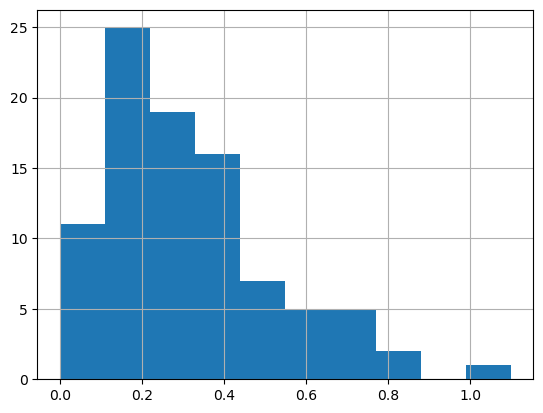

In [39]:
# Predicted ratings' distribution first.
test_pos.pred_rating.hist();

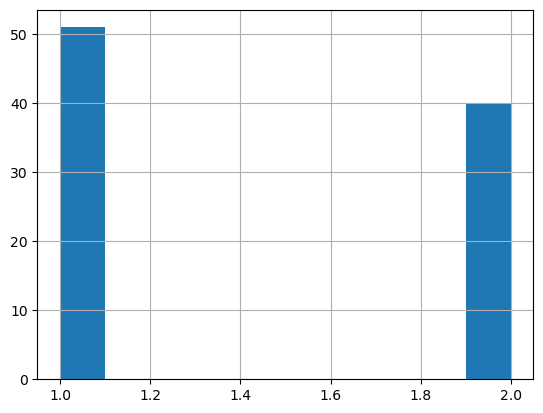

In [40]:
# True ratings' distribution.
test_pos.true_rating.hist();

It looks like our predictions are generally much lower than the true ratings. Our small visualizations don't seem to be enough to evaluate the quality of our predictions.

Let's try to quantify this.

# 4.&nbsp;Performance metrics

From the various metrics available, let's pick the $R^2$ score first to quantify the difference between the predicted and the true ratings. As a second step, we will use the mean absolute error.

## 4.1&nbsp;$R^2$ score

The highest possible $R^2$ score is 1 while usually, the lower boundary is 0. Nevertheless, the $R^2$ can also become negative when the predicted values perform worse than just using the average score for each prediction would have been.

Have a look at the documentation of the $R^2$ score [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2%20score#sklearn.metrics.r2_score).

In [41]:
from sklearn.metrics import r2_score

In [42]:
# Calculate R squared for all predictions and true ratings.
r2_score(test_pos.true_rating, test_pos.pred_rating)

-5.229145268690501

A negative $R^2$ score! Let's try a different metric.

## 4.2&nbsp;Mean Absolute Error

In [43]:
from sklearn.metrics import mean_absolute_error

In [44]:
# Calculate MAE for all predictions and true ratings.
mean_absolute_error(test_pos.true_rating, test_pos.pred_rating)

1.1258641792203279

Let's visualize the mean absolute errors for each rating.

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

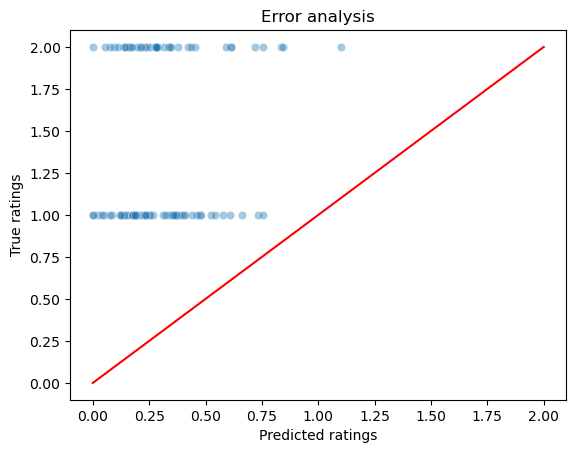

In [46]:
plt.title('Error analysis')
plt.xlabel('Predicted ratings')
plt.ylabel('True ratings')

# Plot diagonal for predictions = true ratings.
sns.lineplot(x=[0,2], y=[0,2], color='red')
# For each test datapoint, plot predicted vs. true rating.
sns.scatterplot(x=test_pos["pred_rating"], y=test_pos["true_rating"], alpha=0.4);

We know that our model won't be capable of exact predictions (i.e. values on the red diagonal). Luckily, this doesn't matter much for recommenders.

Instead, we need to be able to rank items from most likely to be enjoyed to least likely.

Therefore, it is more important for us that the order is correct. To check for this, we will investigate whether the predicted values for true values of 2 are higher than the predicted values for true values of 1.

Average predicted score for true ratings of 2.

In [47]:
# Filter for true ratings of 2.
test_pos.loc[test_pos.true_rating==2,:]["pred_rating"].mean()

0.34185354397750806

Average predicted score for true ratings of 1.

In [48]:
# Filter for true ratings of 1.
test_pos.loc[test_pos.true_rating==1,:]["pred_rating"].mean()

0.2916121163107808

We can see that on average, our recommender predicts higher ratings for restaurants whose true ratings are also higher. This means that in general, our recommender performs reasonably well at finding the correct order.

# 5.&nbsp;Challenge

Evaluate whether a recommender system using the sum of `rating + food_rating + service_rating` instead of only the `rating` is better?

In [49]:
frame.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [ ]:
# Evaluate whether a recommender system using the sum of `rating + food_rating + service_rating` instead of only the `rating` is better?

# Create a copy of the users-items DataFrame and set all values to zero.

train = users_items.copy()


